In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


Load datasets

In [7]:
customers = pd.read_csv('/content/Customers.csv')
transactions = pd.read_csv('/content/Transactions.csv')

Data Preparation

In [10]:
#merge data
data = transactions.merge(customers, on="CustomerID", how="inner")

In [11]:
# Feature Engineering
customer_features = data.groupby("CustomerID").agg(
    TotalSpending=("TotalValue", "sum"),
    AvgSpending=("TotalValue", "mean"),
    TransactionCount=("TransactionID", "count"),
    Region=("Region", lambda x: x.iloc[0]),  # Assuming Region is consistent per customer
).reset_index()

In [12]:
# Encode Categorical Features
label_encoder = LabelEncoder()
customer_features["Region"] = label_encoder.fit_transform(customer_features["Region"])

# Normalize Features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(
    customer_features[["TotalSpending", "AvgSpending", "TransactionCount", "Region"]]
)

K-Means clustering

In [13]:
# K-Means Clustering
db_scores = []
for k in range(2, 11):  # Test 2 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_features)
    db_score = davies_bouldin_score(scaled_features, clusters)
    db_scores.append((k, db_score))

# Optimal Number of Clusters
optimal_k = min(db_scores, key=lambda x: x[1])[0]
print(f"Optimal number of clusters: {optimal_k}")

Optimal number of clusters: 10


In [14]:
# Fit K-Means with Optimal Clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_features["Cluster"] = kmeans.fit_predict(scaled_features)

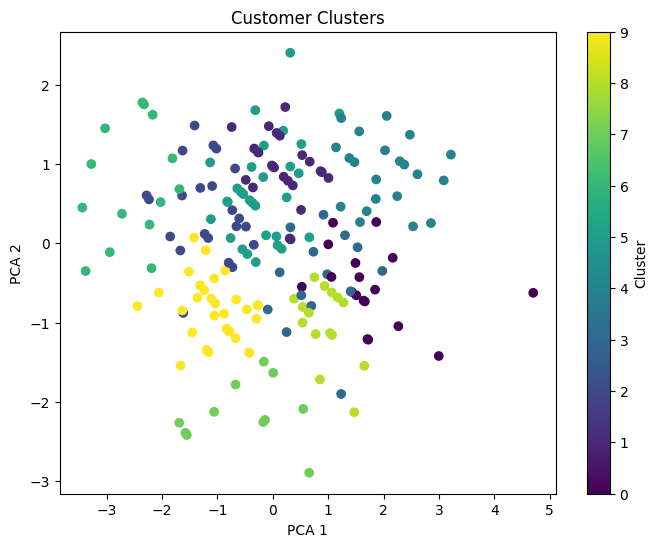

In [15]:
# Visualization with PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=customer_features["Cluster"], cmap="viridis")
plt.title("Customer Clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.show()

# Save Results
customer_features.to_csv("Chetnya_Sharma_Clustering.csv", index=False)